GROUP MEMBERS:  SAI PRATEEK ATLURI,
SATHWIKA SUDDALA

# **PROBLEM STATEMENT:**

The problem statement seeks to determine the likelihood of survival for individuals aboard the sinking Titanic and the specific characteristics that influenced their survival. The main goal is to analyze attributes such as age, socio-economic class, gender, and cabin allocation and understand the relationships between these attributes and their impact on the passengers' survival.

# **DATA POPULATION:**

The data population in this problem refers to the passengers who are on  the titanic at the time of disaster. This population consists of **2,224 passengers and crew members** who were onboard the ship when it sank on April 15, 1912.

# **Kaggle account:** prateek atluri

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/BigData/project'

/content/drive/MyDrive/BigData/project


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_file=('train.csv')
with open(train_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))


0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'
10 	 '10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n'
11 	 '11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n'
12 	 '12,1,1,"Bonnell, M

In [5]:
test_file=('test.csv')
with open(test_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'
5 	 '896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\n'
6 	 '897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\n'
7 	 '898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\n'
8 	 '899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\n'
9 	 '900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\n'
10 	 '901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\n'
11 	 '902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\n'
12 	 '903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\n'
13 	 '904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",fe

# **DATA**

**Loading the data into Data Frames**

In [6]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Description of Data
**PassengerId:** each row represents a unique passenger(891). And it is Int data type. this number is unique for every passenger.

**Survived**:it has only 2 values 0 or  1 either they survived or not. And it is Int data type.

**Pclass:** this column represents socio-economic class of each passenger either 1st or 2nd or 3rd. And it is Int data type.

**Name:** This column represents name of the passenger.  And it is String data type. And it is String data type.

**Sex:** This column  refers to the gender of passenger either male or female. And granularity is at the individual passenger level. And it is String data type.

**Age:** This column refers to the age of the passenger but there are few missing values since the train data 891 values but age had only 714 values according to train.info(). And it is String data type.

**SibSp:** This column refers to number of siblings or spouses in the ship for every passenger.  And it is Int data type.

**Parch:** This column refers to  the number of parents or children in the ship for every passenger. And it is Int data type.

**Ticket:** This column refers to the ticket numbers. And it is String data type.
**Fare:**This column refers to the price of the ticket paid by each passenger. And it is Int data type.

**Cabin:** This column refers to the cabin number and it had many missing values.  And it is String data type.

**Embarked:** This column refers to port of embarkation where it had 3 options C= Cherbourg, Q = Queenstown, S = Southampton for every passenger. But it had 2 missing values. And it is String data type.

# **DATA** **WRANGLING**

#### Exploring the data

Now we want to understand its:

* **Structure** -- the table’s rows and columns.
* **Granularity** -- describe what each row in the table represents
* **Scope** -- Do the data match your understanding of the population?
* **Temporality** -- how is the data situated in time
* **Faithfulness** -- how well does the data capture "reality"



# **Structure:**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


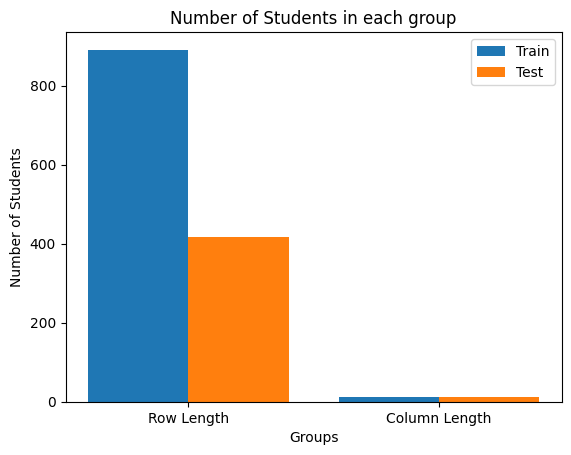

In [10]:
X = ['Row Length','Column Length']
train_shape= train.shape
test_shape= test.shape

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, train_shape, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test_shape, 0.4, label = 'Test')

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

Structure of train data is rectangular format i.e,
* **Rows** -- 891
* **Columns** -- 12

Structure of test data is rectangular format i.e,
* **Rows** -- 418
* **Columns** -- 11

# **GRANULARITY**

Granularity refers to "describe what each row in the table represents".


**Bar plot to show the survival rate for passengers in each passenger class.**

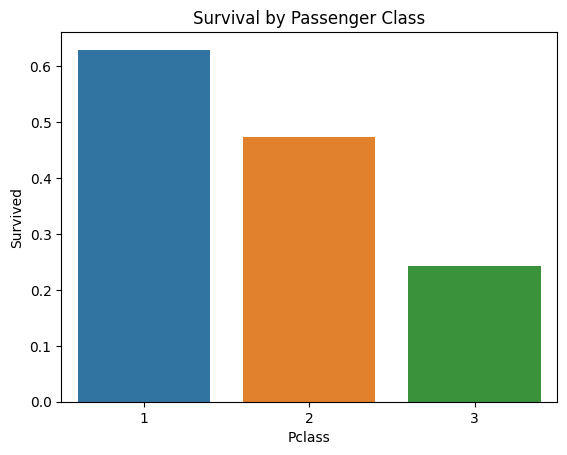

In [11]:

sns.barplot(data=train, x='Pclass', y='Survived', errorbar=None)
plt.title('Survival by Passenger Class')
plt.show()

**Bar plot to show the survival rate for male and female passengers.**

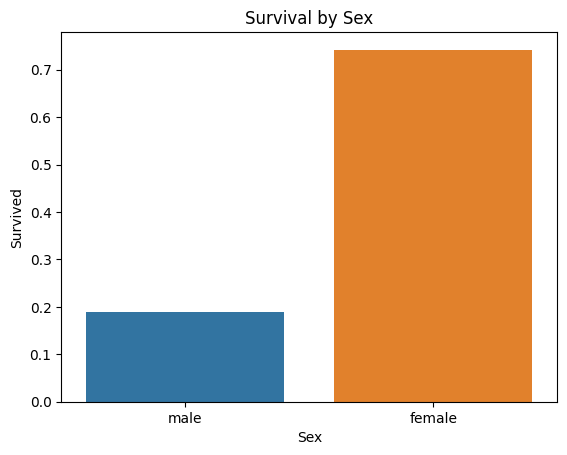

In [12]:
sns.barplot(data=train, x='Sex', y='Survived', errorbar=None)
plt.title('Survival by Sex')
plt.show()

**Bar plot to show the survival rate  by stations passengers have embarked on.**

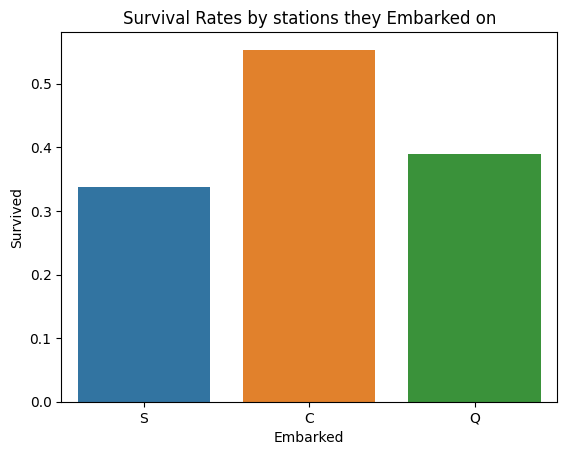

In [13]:
sns.barplot(data=train, x='Embarked', y='Survived', errorbar=None)
plt.title('Survival Rates by stations they Embarked on')
plt.show()

In [14]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


in the Titanic dataset:

* The granularity is at the level of individual passengers.
* Every row represents a single passenger.
* The data captures detailed information about each passenger's attributes.
* The investigation of how various attributes and factors affected each passenger's chance of survival is made possible by this level of granularity.


# **SCOPE**

 The dataset is mainly concerned with characteristics that are important for analysing survival and associated variables. There is no other data regarding the lives of the individuals or their trip plans provided. Also scope refers to how incomplete is the data.

**Data Quality Assessment:**

If there are many missing values (NAN's), it can indicate data quality issues or areas that need attention. The count of non-null values helps analyse the data's quality.

 It's important to count how many data values are not empty in each column when working with data. This helps with tasks like filling in missing values or choosing which columns to keep or remove.




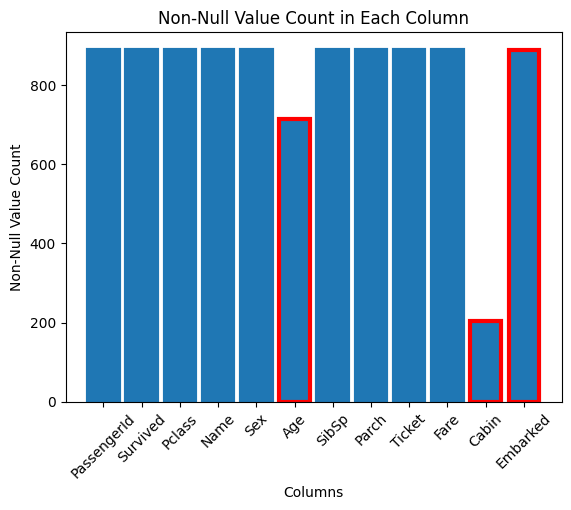

In [15]:
non_null_counts=train.count()
colors = ['red' if count < train.shape[0] else 'tab:blue' for count in non_null_counts]
plt.bar(non_null_counts.index, non_null_counts.values,edgecolor=colors, linewidth=3)
plt.xlabel("Columns")
plt.ylabel("Non-Null Value Count")
plt.title("Non-Null Value Count in Each Column")
plt.xticks(rotation=45)
plt.show()

Above bar plot shows the Non-null value count in Each column. The columns which are marked red have missing values.

**MISSING VALUES:**

 The attribute Age has missing values out of 891 it had 714 values.

 The attribute Cabin has a lot of missing values, out of 891 it had only 204 values which makes it difficult to predict the survival of passenger.

 The attribute Embarked has 2 missing values.

# Does my data cover my area of interest?

Yes the data covers my interest in finding the survival of a passenger.

# Is my data too expansive?

No, the data we have is not expansive. as it has the details of passangers which is exactly enough for us to predict survival of a passenger.

# **Temporality**

The Titanic dataset, primarily captures a specific historical event: the sinking of the RMS Titanic during its maiden voyage in April 1912. In this context, **the temporality of the Titanic dataset is tied to this singular event**.

**Date of the Disaster**: The most significant temporal aspect of the Titanic dataset is the date of the disaster, which occurred on April 15, 1912. This date is crucial for understanding the context of the data and the sequence of events surrounding the sinking.

**Age**: The ages of passengers, though not timestamp data, provide a sense of the life stage of each passenger at the time of the voyage.


The Titanic dataset is **not a time series dataset** in the typical sense. It doesn't include data recorded at regular time intervals, and it is not designed for time series analysis. Instead, the temporal aspects of the dataset are focused on the context and timing of the Titanic disaster, which is the central event in the data.

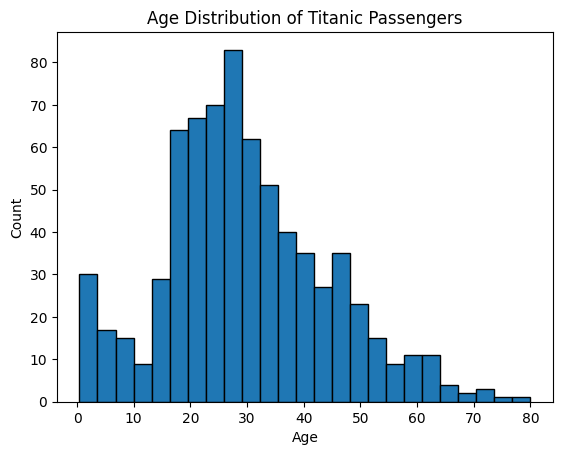

In [17]:
age_dis=train['Age']
age_dis=age_dis.dropna()
# Create a histogram to plot the age distribution
plt.hist(age_dis, bins=25, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Titanic Passengers')
plt.show()


As we can see from the distribution approx 50% passengers are in the age group of 18-30.

# **FAITHFULNESS**

The faithfulness of Titanic dataset is highly considered true because it comes from historical records and official Titanic disaster documents. But, there might be problems like missing information or values in the data. So, analysts should be careful and check the data to make sure it's accurate for their specific work.

# **Data Representative**

No, the data obtained doesnot represent whole population of the incident i.e, 2224 people. As it excludes information about the crew. Crew members made up a significant portion of the Titanic's population. From the dataset attributes we can clearly understand that it only represents the passangers details

The data only represents passengers population not the whole data population.

# **Assumptions**

We have to assume that:


*   We are only trying predict the survival of a passenger.
*   Every passenger on the titanic has equal chance of survival.
*   Data we obtained represents the actual people who were in the titanic incident.
*   All the passengers details are accurate.







# **Sampling Method**

The difference in the data population (2224 in the entire Titanic population vs. 891 in the provided data) suggests that a sampling method was likely used during data collection.

The population is divided into subgroups or strata, and a random sample is collected from each stratum. This method is often used to ensure that the sample represents different segments of the population. In the context of the Titanic dataset, **Stratified Sampling** could have been used to obtain a representative sample of passengers.

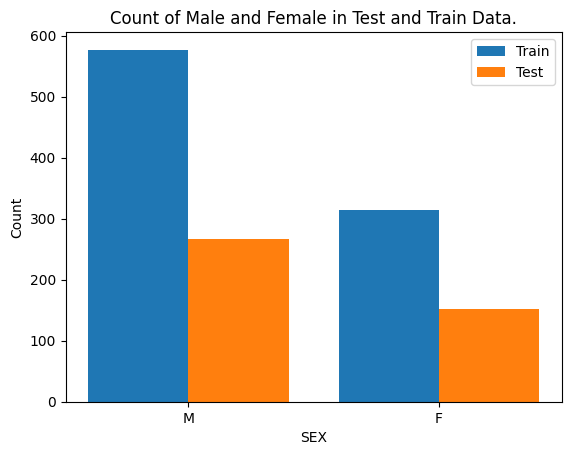

In [ ]:
X = ['M','F']
em_train=train['Sex'].value_counts().tolist()
em_test=test['Sex'].value_counts().tolist()


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, em_train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, em_test, 0.4, label = 'Test')

plt.xticks(X_axis, X)
plt.xlabel("SEX")
plt.ylabel("Count")
plt.title("Count of Male and Female in Test and Train Data.")
plt.legend()
plt.show()

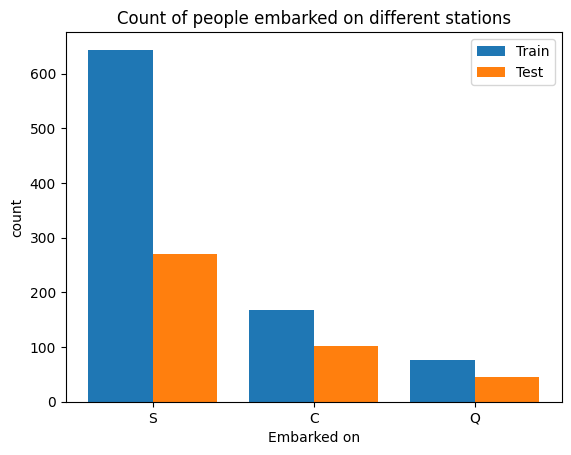

In [ ]:
X = ['S','C','Q']
em_train=train['Embarked'].value_counts().tolist()
em_test=test['Embarked'].value_counts().tolist()


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, em_train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, em_test, 0.4, label = 'Test')

plt.xticks(X_axis, X)
plt.xlabel("Embarked on")
plt.ylabel("count")
plt.title("Count of people embarked on different stations")
plt.legend()
plt.show()

**As the attributes' ratios (proportions) are similar in both the training and test datasets, it may suggest that the original data source was stratified during the splitting of data into these trainand test subsets.**

# **STAGE-2**

# **1.1 Stage-1**

**Comments returned in stage-1**


*   **Moved the data types to Structure**



# **1.2 EDA and Data Transformation**

**Describe the transformations of the data you have applied**



*   NULL values in attributes Age, Embarked have been replaced with Median and Mode respectively.
*   we used lable encoding for Sex and Embarked to replace categorical values to numerical values.

* Tried Feature engineering, but it only decreased the accuracy.



**Handling missing values**

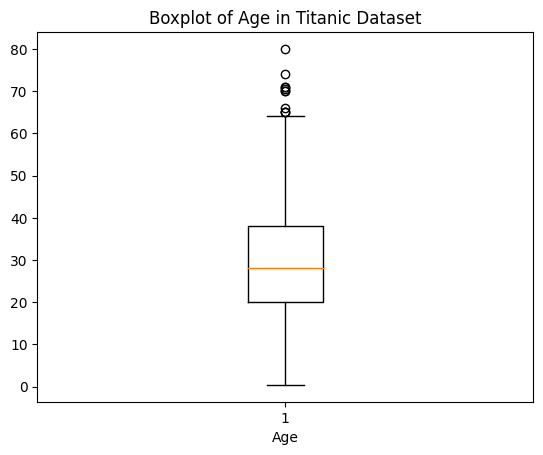

In [ ]:
plt.boxplot(age_dis)  # vert=False for a horizontal boxplot
plt.title('Boxplot of Age in Titanic Dataset')
plt.xlabel('Age')
plt.show()

**The box plot shows outliers in the "Age" column of the Titanic dataset, it's a good practice to consider imputing missing values with the median rather than the mean.**

In [ ]:
median=train['Age'].median()
train['Age'].fillna(value=median, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Replacing missing values in Embarked column with most frequent value.**

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [ ]:
from sklearn import preprocessing

lesex = preprocessing.LabelEncoder()
leemb = preprocessing.LabelEncoder()
# Encode labels
train['Sex']=lesex.fit_transform(train['Sex'])
train['Embarked']=leemb.fit_transform(train['Embarked'])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


**What are the features you choose to use for modeling? Why?**

choosing the attributes because:


*   Pclass: numerical attribute and it has no missing values
*   Sex: This attribute is encoded as binary variable(1 for male, 0 for female)i.e., numerical attribute and it has no missing values
*   Age: numerical attribute and it has no missing values
*   SibSp: numerical attribute and it has no missing values
*   Parch: numerical attribute and it has no missing values
*   Fare: It is a continuous variable, numerical attribute and helps in predicting.
*   Embarked: This attribute is label encoded(0 for C, 1 for Q, 2 for  S)  numerical attribute and it has no missing values

chose these attributes because they represent the demographic data of the passanger.

Not chose the attributes because:

*  PassengerId: as this attribute contain all unique values it does not help for prediction
*  Name: as this attribute contain all unique values it does not help for prediction
*   Ticket: as this attribute contain all unique values it does not help for prediction
*   Cabin	: as most of the rows in the attribute are missing. using it might affect the accuracy.







**Readiness of the data**

yes, the data for training is ready. except we can also normalization but it is also not required. Because the only attributes that require scaling are Age and Fare, and they don't vary much as they have a linear distribution.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
age_s = MinMaxScaler()
fare_s=MinMaxScaler()

train["Age"]=age_s.fit_transform(train[["Age"]])
train["Fare"]=fare_s.fit_transform(train[["Fare"]])

# **1.3 Modeling**

**Describe the chosen model and why choose this one.**



**Logistic Regression:**
Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict the probability that an instance belongs to a particular class.

In the survival of Titanic passengers problem, we are supposed to predict if the passenger survived or not which is a classification problem, It is very well known that Logistic Regression is used for classification problem.

* Model Formulation: The logistic regression model uses the logistic function (sigmoid function) to model the relationship between the input features and the binary outcome.
* Output:The output of the logistic regression model is a probability score between 0 and 1, representing the likelihood of the instance belonging to the positive class.
* Decision Boundary:A decision boundary is determined by a threshold (commonly 0.5). If the predicted probability is above the threshold, the instance is classified as the positive class; otherwise, it is classified as the negative class.



**Describe how the chosen features in 1.2 are involved in the chosen model**

The logistic regression model can be represented as a weighted linear combination of features, transformed through a logistic function to produce probabilities.

Each chosen attribue will be associated with weights, i.e, wo,w1,w2,w3...
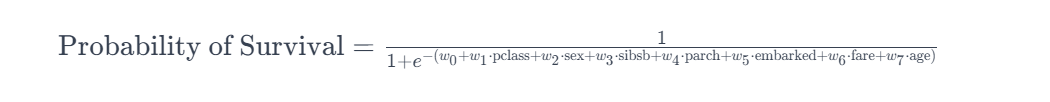

It's important to note that the coefficients w0,w1,w2,w3,w4,w5,w6 are learned during the training process, and they reflect the contribution of each feature to the logistic regression model's predictions based on the training data.

**Describe the loss function that will be used to estimate the model's parameters**

for logistic regression we use: **binary cross-entropy loss**

This loss function is employed to measure the difference between the predicted probabilities of the model and the true labels. The goal during training is to minimize this loss.

For binary classification problems, where the target variable has two classes (0 and 1), the logistic loss for a single instance can be defined as follows:

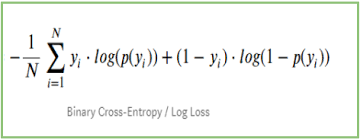

The goal during training is to find the model parameters (weights and bias) that minimize this average loss across the entire training dataset.

The logistic loss is well-suited for logistic regression because it reflects the probabilistic nature of the model. It encourages the model to assign high probabilities to the correct class and low probabilities to the incorrect class. The minimization of the logistic loss is typically achieved using optimization algorithms, such as gradient descent, during the training process.

**Use a specific way (different ways have been discussed in A3) to estimate the model's parameters (e.g., sklearn's fit).**

In [ ]:
x=train.iloc[:,[2,4,5,6,7,9,11]].values
y=train.iloc[:,1].values

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x, y)

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = classifier.coef_
intercept = classifier.intercept_
print(f"Coefficients: {coefficients},\nIntercept: {intercept}")

Coefficients: [[-1.0229795  -2.61382276 -2.22826139 -0.28134863 -0.06409345  0.48500916
  -0.2282387 ]],
Intercept: [4.72102555]


**Use the model estimated to conduct a submission to the Kaggle competition and screenshot your leaderboard position.**

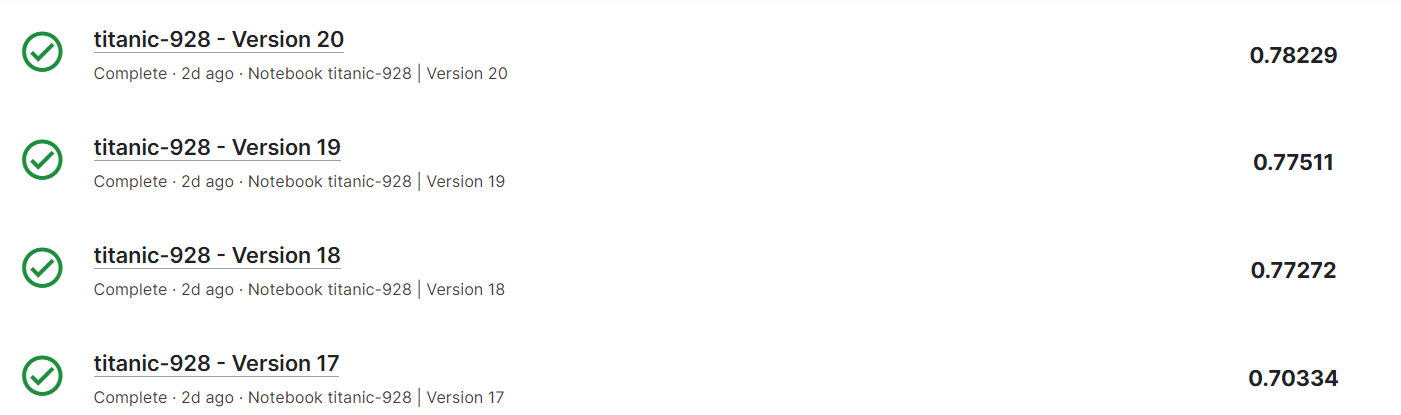

# **1.4 Inference**

**Correct choose of standard evaluation metric(s) for comparison, e.g., MSE for regression, accuracy for classification.**


*   Since this is classification, we choose **accuracy** as our evaluation metric.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler

classifierA=LogisticRegression(max_iter=10000)
classifierB=RandomForestClassifier(n_estimators=150,max_depth=3)

In [ ]:
validation_accuracies_A = []
validation_accuracies_B = []
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, valid_idx in stratified_kfold.split(x, y):

  split_X_train, split_X_valid =x[train_idx],x[valid_idx]
  split_Y_train, split_Y_valid = y[train_idx],y[valid_idx]


  oversampler = RandomOverSampler()
  split_X_train_resampled, split_Y_train_resampled = oversampler.fit_resample(split_X_train, split_Y_train)


  classifierA.fit(split_X_train_resampled,split_Y_train_resampled)


  pred1=classifierA.predict(split_X_valid)
  accuracyA =accuracy_score(pred1,split_Y_valid)
  validation_accuracies_A.append(accuracyA)


  classifierB.fit(split_X_train_resampled,split_Y_train_resampled)
  pred2=classifierB.predict(split_X_valid)

  accuracyB = accuracy_score(pred2,split_Y_valid)

  validation_accuracies_B.append(accuracyB)
print("Mean Accuracies")
print(f"Logistic regression:{np.mean(validation_accuracies_A)}, Random Forest:{np.mean(validation_accuracies_B)}")

Mean Accuracies
Logistic regression:0.7822672776348002, Random Forest:0.7900947837549432


**Fair performance comparison between A and B with clear explanation on which is better and why**

In [ ]:
from scipy import stats

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(validation_accuracies_A, validation_accuracies_B)

# Set your significance level (alpha)
alpha = 0.05
print(f"P Value is {p_value}\n")
# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference between the two models.")
else:
    print("There is no significant difference between the two models.")

P Value is 0.6693156434570924

There is no significant difference between the two models.


As we can see, Both the models have similar predictions as they both are very suitable for binary classification. But, Random forest classifier has better accuracy because:


*   Random Forest can capture complex non-linear relationships in the data, as it is an ensemble of decision trees.
*   Random Forest is generally more robust to outliers and noise in the data. Individual decision trees can be sensitive to outliers, but the ensemble nature of Random Forest helps mitigate their impact
*   Random Forest has several hyperparameters that can be tuned to optimize its performance for a specific task. Proper tuning can enhance its accuracy on the given dataset.




**Conduct at least another submission to Kaggle and check if your leaderboard position can be improved**

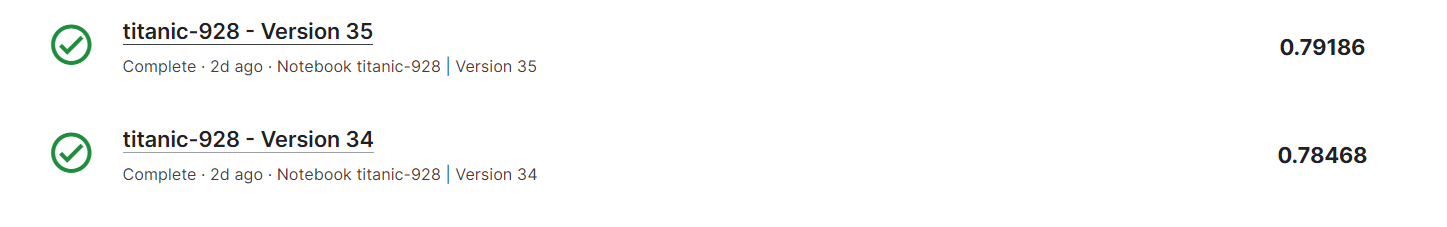

# **1.5 Conclusions and Learnings**

**A convincing conclusion about the findings**

In conclusion, our exploration of the Titanic dataset for the survival prediction problem involved the application of two different models: Random Forest and Logistic Regression. The initial Random Forest model, using a set of chosen features, demonstrated a commendable accuracy range of 79-80%.

Later, attempts to improve accuracy through feature engineering by introducing additional attributes resulted in a decline in performance, prompting us to retain the original feature set.

On the other hand, Logistic Regression, with the same feature set, achieved a slightly lower accuracy of 78%. While both models exhibited comparable performance, the Random Forest model emerged as the marginally superior choice in terms of accuracy.

It's worth noting that the decision to stick with the existing features and the choice between Random Forest and Logistic Regression depends on various factors, including interpretability, computational efficiency, and the nature of the dataset. In this scenario, where the goal was to predict survival on the Titanic, the Random Forest model provided a slightly better predictive performance. However, the interpretability and simplicity of the Logistic Regression model could still be advantageous in certain contexts.

Ultimately, the choice between these models and the decision to include or exclude specific features should be guided by a nuanced understanding of the problem at hand, considering trade-offs between model complexity and predictive accuracy.

**What you have learned from this project**

**Importance of Feature Selection:** The choice of features significantly influences model performance. It's important to select features that contribute meaningfully to the prediction task. In some cases, a carefully chosen subset of features may outperform a model with a larger feature set.

**Model Comparison:** Comparing the performance of different models is an integral part of the data science process. In this case, Random Forest and Logistic Regression, despite their differences in complexity, demonstrated similar accuracy levels. The choice between models should consider factors beyond accuracy, such as interpretability and computational efficiency.

**Feature Importance and Engineering:** Understanding the importance of features in a predictive model is crucial. Feature engineering, while potentially beneficial, can sometimes lead to a decrease in model performance. It is essential to carefully evaluate the impact of new features on the overall predictive accuracy.

In [ ]:
!pip install nbconvert

In [ ]:
%shell jupyter nbconvert --to html ProjectStage1.ipynb

[NbConvertApp] WARNING | pattern 'ProjectStage1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 

CalledProcessError: ignored